# Single Neuron Logistic Regression
## In this notebook, I will build a Single Neuron Logistic Regression model to predict if a player will last 5 years in league.

### Load necessary libraries and the dataset.

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

sns.set_theme()
df = pd.read_csv("nba_logreg.csv")

### Then, let's check our dataset.

In [12]:
df.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [13]:
df.shape

(1340, 21)

In [14]:
df.isna().sum()

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

### According to the result, there are 21 variables in the dataset. Besides, there are 11 missing values in '3P%' variable. Just because there are total 1340 data points in the dataset, 11 missing values can be left out. It will not cause big problem for building models. Also, I delete 'name' variable for it is a string which will not contribute to the label.

### Define X and y, seperate the dataset as training dataset and testing dataset.

In [25]:
df=df.drop(df[df['3P%'].isnull()].index)
y = df['TARGET_5Yrs']
columns_to_drop = ['TARGET_5Yrs','Name']
X = df.drop(columns=columns_to_drop)
print(X.shape)
print(y.shape)

(1329, 19)
(1329,)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

### After dealing with the missing values, we can begin with building the Single Neuron Logistic Regression model.

In [17]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                error = (self.predict(xi) - target)
                self.w_[:-1] -= alpha*error*xi
                self.w_[-1] -= alpha*error
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()

In [23]:
def cross_entropy_loss(y_hat, y):
    epsilon = 1e-15  # or another small value
    return - y * np.log(y_hat + epsilon) - (1 - y) * np.log(1 - y_hat + epsilon)

In [27]:

node = SingleNeuron(sigmoid, cross_entropy_loss)
X_train=X_train.astype(float)
X_train=X_train.values
y_train=y_train.astype(float)
y_train=y_train.values
node.train(X_train, y_train, alpha = 0.01, epochs = 10_000)

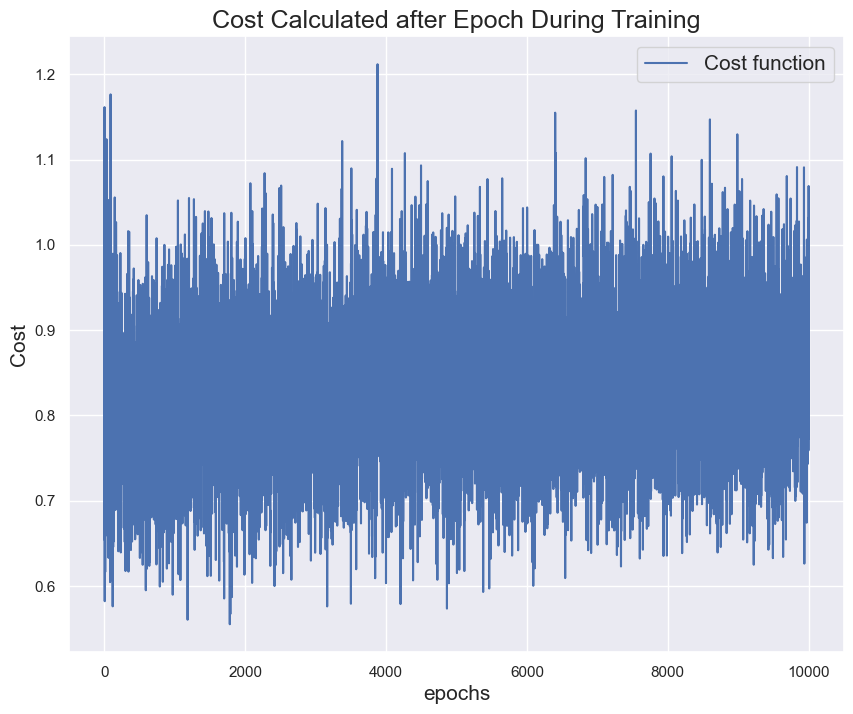

In [28]:
node.plot_cost_function()
plt.show()

In [29]:

np.rint(node.predict(X_train)) != y_train
classification_error = (np.rint(node.predict(X_train)) != y_train).astype(int)
print(f"Classification Error of training dataset = {sum(classification_error)/ len(y_train)}")
X_test=X_test.astype(float)
X_test=X_test.values
y_test=y_test.astype(float)
y_test=y_test.values
classification_error1 = (np.rint(node.predict(X_test)) != y_test).astype(int)
print(f"Classification Error of testing dataset = {sum(classification_error1)/ len(y_test)}")




Classification Error of training dataset = 0.32831608654750705
Classification Error of testing dataset = 0.3082706766917293


### According to the result, the classification error of training dataset is about 33%. The classification Error of testing dataset is about 31%.